In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots.constants.color import rgb
df = pd.read_csv("../dat/fixed_model_results.csv")
# I only want continuous independent variables
df = df[df["Num_Categorical_Vars"] == 0]
df = df.fillna({'Hyperparameter_2': 99, 'Hyperparameter_3': 99})

In [134]:
# Update global settings with JMLR base and your customizations
plt.rcParams.update(bundles.jmlr2001())
# Additional customizations for 12 pt font
plt.rcParams.update({"font.size": 12})

In [140]:
groupby_list = ['Classes_Dep_Var', 'Sample_Size', 'Model', 'Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3']
# get the best performing specification for each model x n_classes x sample size combination without RandomForest
df_specific_means = df[df['Model'] != 'RandomForest'].groupby(groupby_list)['Misclassification'].mean()
errors_bymodel = df_specific_means.groupby(['Classes_Dep_Var', 'Sample_Size', 'Model']).min()
errors_mean = errors_bymodel.groupby(['Classes_Dep_Var', 'Sample_Size']).mean()

In [141]:
data = {
    'CL_Y': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
             3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
             4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
    'V': [3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7,
          3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7,
          3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7],
    'S': [100, 500, 1000, 10000] * 9,
    'ANN': [0.2267, 0.2667, 0.2067, 0.2170, 0.2667, 0.2367, 0.2467, 0.2110, 0.2666, 0.2700, 0.2067, 0.2060,
            0.2600, 0.3667, 0.3000, 0.3287, 0.2000, 0.3733, 0.3253, 0.3373, 0.1667, 0.3933, 0.3200, 0.3373,
            0.3467, 0.4000, 0.4567, 0.4803, 0.4000, 0.4867, 0.5133, 0.4443, 0.4333, 0.5267, 0.4767, 0.4633],
    'DT': [0.2333, 0.3000, 0.2167, 0.2357, 0.2777, 0.2333, 0.2487, 0.2540, 0.2555, 0.2300, 0.3200, 0.2540,
           0.3867, 0.4333, 0.3998, 0.3933, 0.4000, 0.4467, 0.3910, 0.4493, 0.2667, 0.4933, 0.3544, 0.4493,
           0.4467, 0.4667, 0.4999, 0.5280, 0.5000, 0.5600, 0.5355, 0.5527, 0.5000, 0.5867, 0.5103, 0.5597],
    'LR': [0.2000, 0.2000, 0.2170, 0.2170, 0.1800, 0.1800, 0.2060, 0.2060, 0.1667, 0.1667, 0.2060, 0.2060,
           0.2267, 0.3333, 0.3267, 0.3323, 0.2333, 0.3800, 0.3220, 0.3410, 0.1667, 0.5200, 0.3300, 0.3410,
           0.3733, 0.4333, 0.4899, 0.4899, 0.4000, 0.5067, 0.4657, 0.4657, 0.4333, 0.5200, 0.4900, 0.4900]
}

df_orig = pd.DataFrame(data)

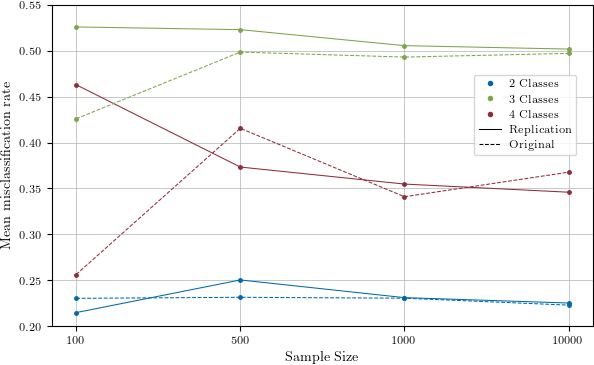

In [142]:
fig, ax = plt.subplots()

# Convert Sample_Size to categorical
sample_sizes = [100, 500, 1000, 10000]

# Plot the data
for class_dep_var, color in zip([2, 3, 4], [rgb.tue_blue, rgb.tue_red, rgb.tue_green]):
    ax.plot(
        range(len(sample_sizes)),  # Treat the sample sizes as categories (0, 1, 2, ...)
        errors_mean.loc[class_dep_var].values,  # Corresponding misclassification values
        '.-', ms=5, lw=0.75, color=color, label=f"Classes_Dep_Var={class_dep_var}"
    )

# Plot original results
for class_dep_var, color in zip([2, 3, 4], [rgb.tue_blue, rgb.tue_red, rgb.tue_green]):
    # Filter original data for the class and calculate mean misclassification across ANN, DT, and LR
    original_means = (
        df_orig[df_orig['CL_Y'] == class_dep_var]
        .groupby('S')[['ANN', 'DT', 'LR']].mean()  # Group by sample size and calculate the mean
        .mean(axis=1)  # Take the mean across ANN, DT, and LR
    )
    ax.plot(
        range(len(sample_sizes)),  # Treat the sample sizes as categories (0, 1, 2, ...)
        original_means.values,  # Corresponding misclassification values
        '.--', ms=5, lw=0.75, color=color, label=f"Classes_Dep_Var={class_dep_var} (Original)"
    )

# Add labels and grid
ax.set_xlabel("Sample Size")
ax.set_ylabel("Mean misclassification rate")
ax.set_ylim([0.2, 0.55])

# Set x-ticks and labels to treat Sample_Size as categorical
ax.set_xticks(range(len(sample_sizes)))  # Positions for the categories
ax.set_xticklabels(sample_sizes)  # Labels for the categories
ax.grid(axis="both", color=rgb.tue_gray, linewidth=0.5)

# Custom legend
dot_2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=rgb.tue_blue, markersize=5, label="2 Classes")
dot_3 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=rgb.tue_green, markersize=5, label="3 Classes")
dot_4 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=rgb.tue_red, markersize=5, label="4 Classes")
line_replication = plt.Line2D([0], [1], linestyle='-', color='k', linewidth=0.75, label="Replication")
line_original = plt.Line2D([0], [1], linestyle='--', color='k', linewidth=0.75, label="Original")

ax.legend(handles=[dot_2, dot_3, dot_4, line_replication, line_original], loc="upper left", bbox_to_anchor=(0.77, 0.8))

# Save and show
fig.savefig("../doc/fig/03_interaction_cly_s_cont.pdf")
plt.show()

Now Figure 3. I use the same variable and dataframe names, should be changed later.

In [144]:
groupby_list = ['Classes_Dep_Var', 'Num_Ind_Vars', 'Model', 'Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3']
# get the best performing specification for each model x n_vars x sample size combination without RandomForest
df_specific_means = df[df['Model'] != 'RandomForest'].groupby(groupby_list)['Misclassification'].mean()
errors_bymodel = df_specific_means.groupby(['Classes_Dep_Var', 'Num_Ind_Vars', 'Model']).min()
errors_mean = errors_bymodel.groupby(['Classes_Dep_Var', 'Num_Ind_Vars']).mean()

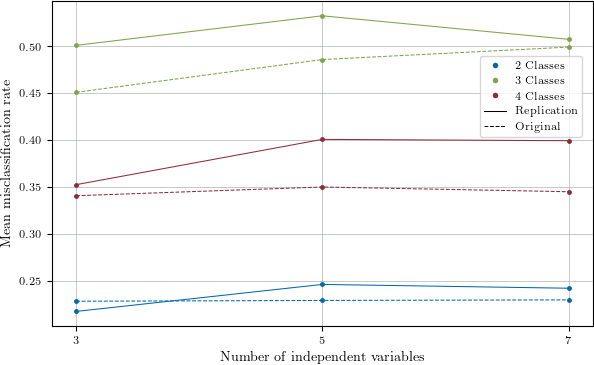

In [150]:
fig, ax = plt.subplots()

# Convert Sample_Size to categorical
n_ind_vars = [3, 5, 7]

# Plot the data
for class_dep_var, color in zip([2, 3, 4], [rgb.tue_blue, rgb.tue_red, rgb.tue_green]):
    ax.plot(
        range(len(n_ind_vars)), 
        errors_mean.loc[class_dep_var].values,  # Corresponding misclassification values
        '.-', ms=5, lw=0.75, color=color, label=f"Classes_Dep_Var={class_dep_var}"
    )

# Plot original results
for class_dep_var, color in zip([2, 3, 4], [rgb.tue_blue, rgb.tue_red, rgb.tue_green]):
    # Filter original data for the class and calculate mean misclassification across ANN, DT, and LR
    original_means = (
        df_orig[df_orig['CL_Y'] == class_dep_var]
        .groupby('V')[['ANN', 'DT', 'LR']].mean()  # Group by sample size and calculate the mean
        .mean(axis=1)  # Take the mean across ANN, DT, and LR
    )
    ax.plot(
        range(len(n_ind_vars)),  # Treat the sample sizes as categories (0, 1, 2, ...)
        original_means.values,  # Corresponding misclassification values
        '.--', ms=5, lw=0.75, color=color, label=f"Classes_Dep_Var={class_dep_var} (Original)"
    )

# Add labels and grid
ax.set_xlabel("Number of independent variables")
ax.set_ylabel("Mean misclassification rate")

# Set x-ticks and labels to treat Sample_Size as categorical
ax.set_xticks(range(len(n_ind_vars)))  # Positions for the categories
ax.set_xticklabels(n_ind_vars)  # Labels for the categories
ax.grid(axis="both", color=rgb.tue_gray, linewidth=0.5)

# Custom legend
dot_2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=rgb.tue_blue, markersize=5, label="2 Classes")
dot_3 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=rgb.tue_green, markersize=5, label="3 Classes")
dot_4 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=rgb.tue_red, markersize=5, label="4 Classes")
line_replication = plt.Line2D([0], [1], linestyle='-', color='k', linewidth=0.75, label="Replication")
line_original = plt.Line2D([0], [1], linestyle='--', color='k', linewidth=0.75, label="Original")

ax.legend(handles=[dot_2, dot_3, dot_4, line_replication, line_original], loc="upper left", bbox_to_anchor=(0.78, 0.847))

# Save and show
fig.savefig("../doc/fig/04_interaction_cly_v_cont.pdf")
plt.show()